In [1]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(parallel)
library(ComplexHeatmap)
library(ggsci)
library(tidyverse)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cit

In [6]:
source_data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Figure_Notebooks/Intermediate_files/nDEGs_counts_sourcedata.csv")

In [7]:
head(source_data)

,X,celltype,Direction,type,count
,<int>,<chr>,<chr>,<chr>,<int>
1,1,Activated memory B cell,BR1,DEGs_Male,0
2,2,Adaptive NK cell,BR1,DEGs_Male,0
3,3,ASDC,BR1,DEGs_Male,0
4,4,BaEoMaP cell,BR1,DEGs_Male,0
5,5,C1Q+ CD16 monocyte,BR1,DEGs_Male,1
6,6,CD14+ cDC2,BR1,DEGs_Male,0


In [8]:
# Assuming your data frame is named df
source_data <- source_data %>%
  mutate(sex_label = ifelse(type == "DEGs_Male", "M", "F"))
head(source_data)

,X,celltype,Direction,type,count,sex_label
,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,Activated memory B cell,BR1,DEGs_Male,0,M
2,2,Adaptive NK cell,BR1,DEGs_Male,0,M
3,3,ASDC,BR1,DEGs_Male,0,M
4,4,BaEoMaP cell,BR1,DEGs_Male,0,M
5,5,C1Q+ CD16 monocyte,BR1,DEGs_Male,1,M
6,6,CD14+ cDC2,BR1,DEGs_Male,0,M


In [9]:
#subet the data for only CD14 monocyte subsets



# List of cell types you want to subset
selected_celltypes <- c("Core CD14 monocyte", "ISG+ CD14 monocyte", 'IL1B+ CD14 monocyte', 'Intermediate monocyte', 'Core CD16 monocyte', 'ISG+ CD16 monocyte', 'C1Q+ CD16 monocyte')


# Subset the dataframe for selected cell types
subset_df <- source_data %>%
  filter(celltype %in% selected_celltypes) %>%
  mutate(
    celltype = factor(celltype, levels = selected_celltypes),
    sex_label = factor(sex_label, levels = c("M", "F"))
  )


# View the subset dataframe
head(subset_df)


,X,celltype,Direction,type,count,sex_label
,<int>,<fct>,<chr>,<chr>,<int>,<fct>
1,5,C1Q+ CD16 monocyte,BR1,DEGs_Male,1,M
2,19,Core CD14 monocyte,BR1,DEGs_Male,4,M
3,20,Core CD16 monocyte,BR1,DEGs_Male,2,M
4,38,IL1B+ CD14 monocyte,BR1,DEGs_Male,0,M
5,40,Intermediate monocyte,BR1,DEGs_Male,3,M
6,41,ISG+ CD14 monocyte,BR1,DEGs_Male,8,M


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


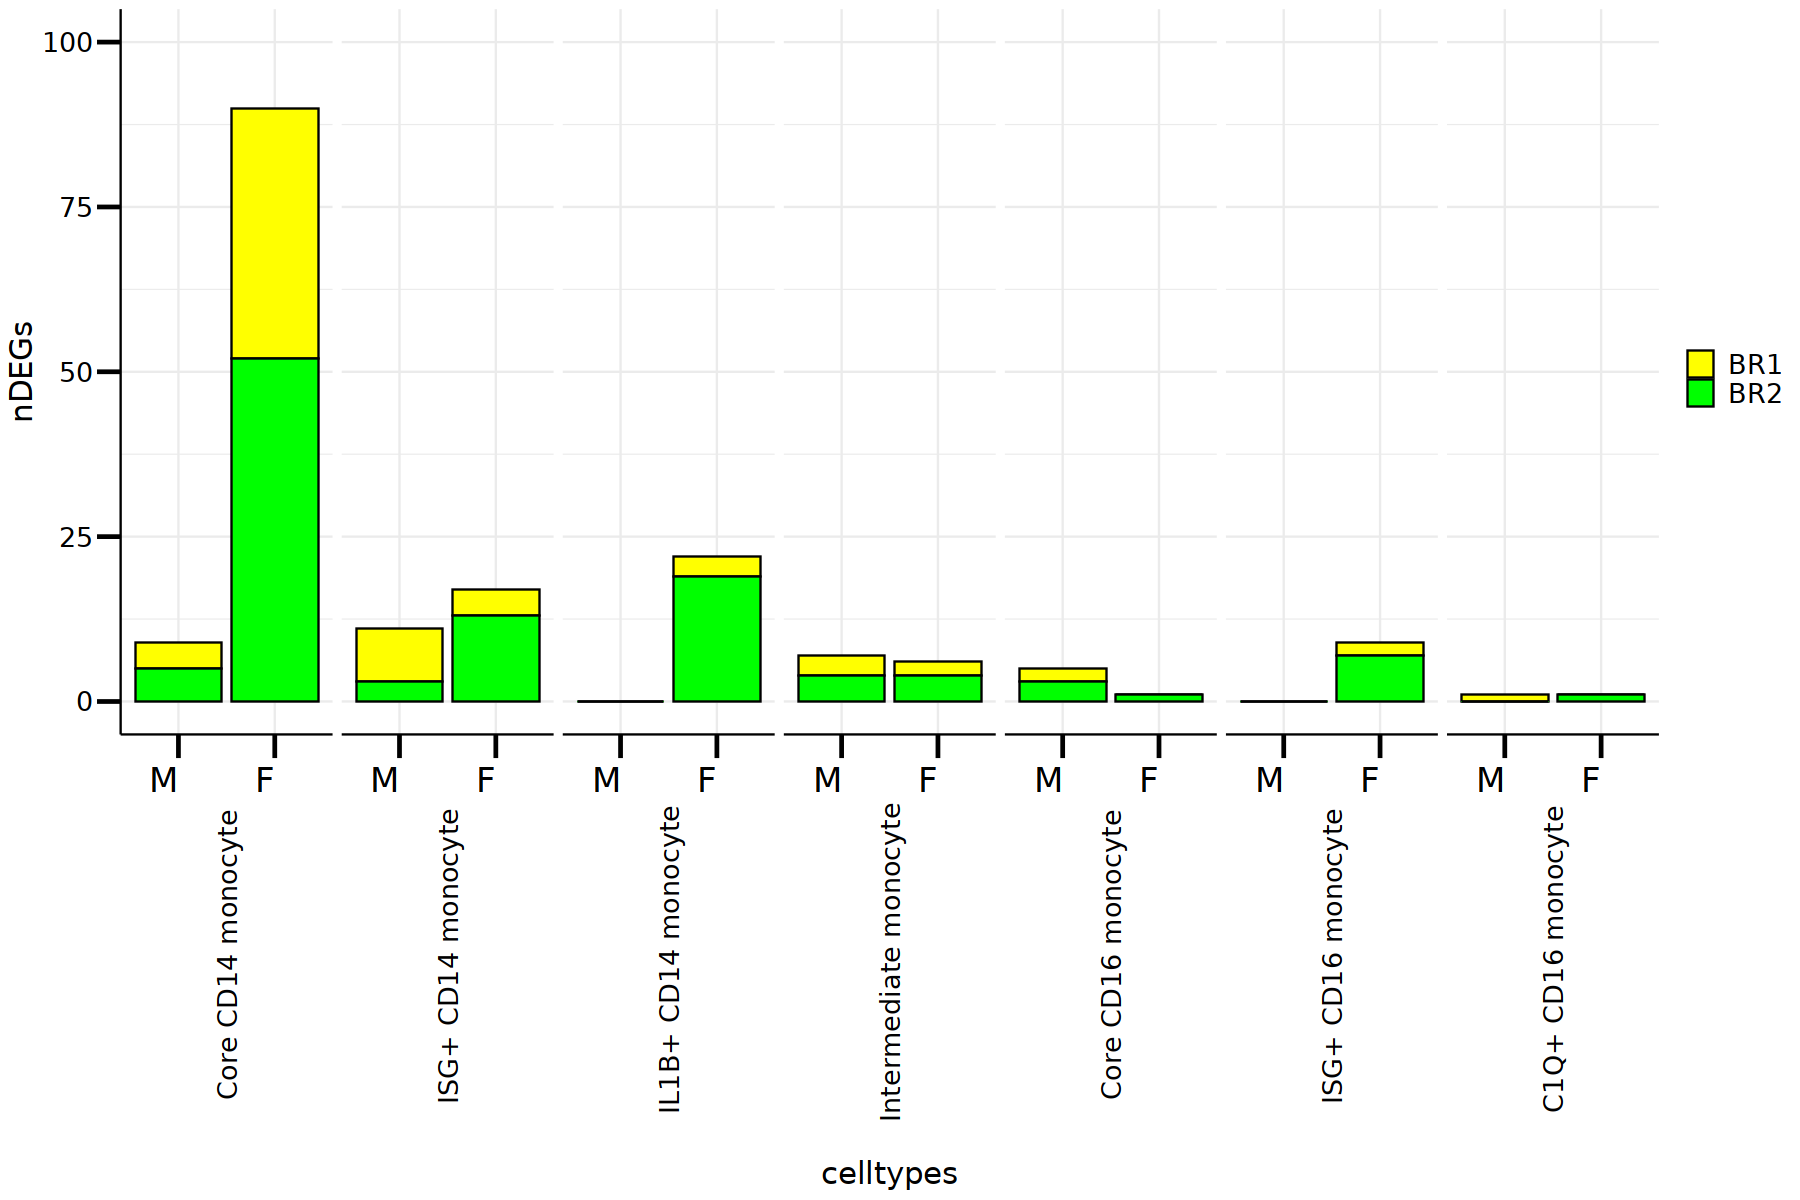

In [10]:
# Grouped and stacked

# Define colors for BR2 and BR1
direction_colors <- c("BR2" = "green", "BR1" = "yellow")


options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(subset_df, aes(fill=Direction, y=count, x=sex_label)) + 
    geom_bar(position="stack", stat="identity", color= "black")+
facet_grid(~ celltype, scales = 'free', switch = 'x') +
scale_fill_manual(values = direction_colors) +
theme_minimal()+
  # theme(strip.placement = "outside",
  #       strip.background = element_rect(fill = NA, color = "white"),
  #       panel.spacing = unit(-.01,"cm"))+
theme(
    text = element_text(size = 16, color = "black"),  
    axis.text.x = element_text(size = 20, angle = 0, hjust = 1, color = "black", vjust = 0.25),
    axis.text.y = element_text(size = 16, color = "black"),
    axis.title = element_text(size = 18, color = "black"),  
    legend.title = element_blank(),  
    legend.text = element_text(size = 16),  
    axis.ticks = element_line(color = 1, linewidth = 1),
    axis.line = element_line(colour = "black", size = 0.5, linewidth = "solid"),
    axis.ticks.length  = unit(0.5, "cm"),
    strip.placement = "bottom",  # Place facet labels at the bottom
    strip.text = element_text(size = 16, color = "black", angle = 90, hjust = 0.75),  # Angle facet labels
    #panel.border = element_rect(color = "black", fill = NA, size = 1)
  )+ ylim (0,100)+  labs(x = "\ncelltypes", y = "nDEGs")